First 5 rows of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   

C:\Users\301456\AppData\Local\Temp\ipykernel_5876\3926195283.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


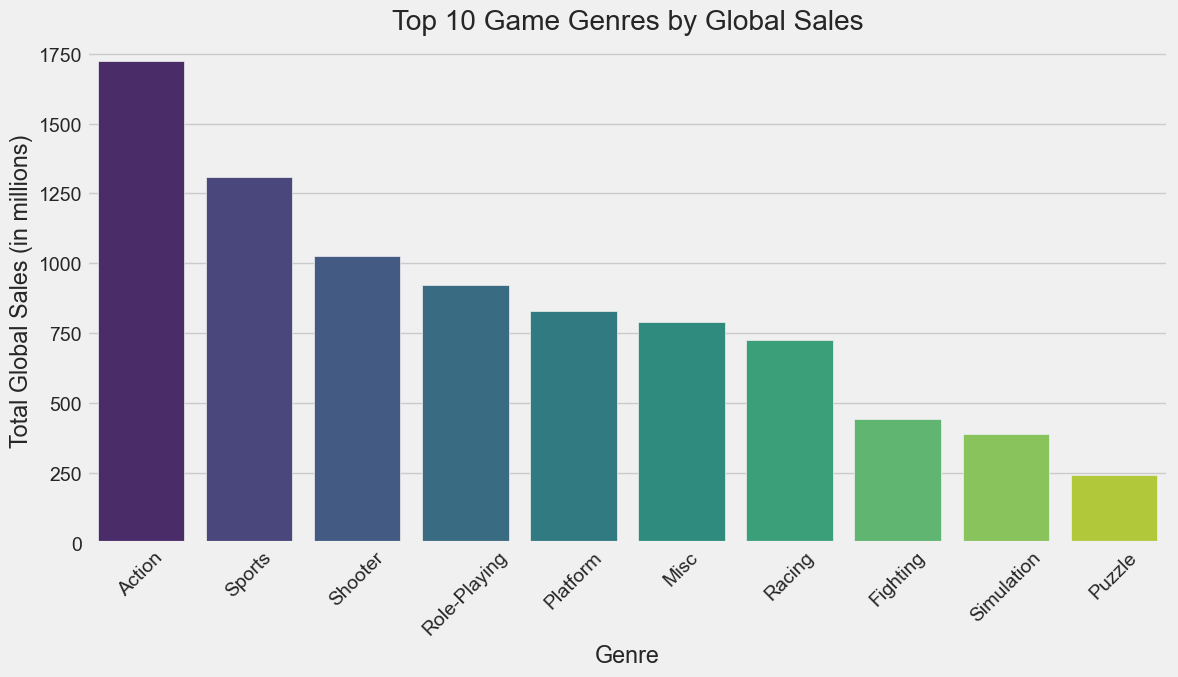

C:\Users\301456\AppData\Local\Temp\ipykernel_5876\3926195283.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform', order=top_platforms, palette='rocket')


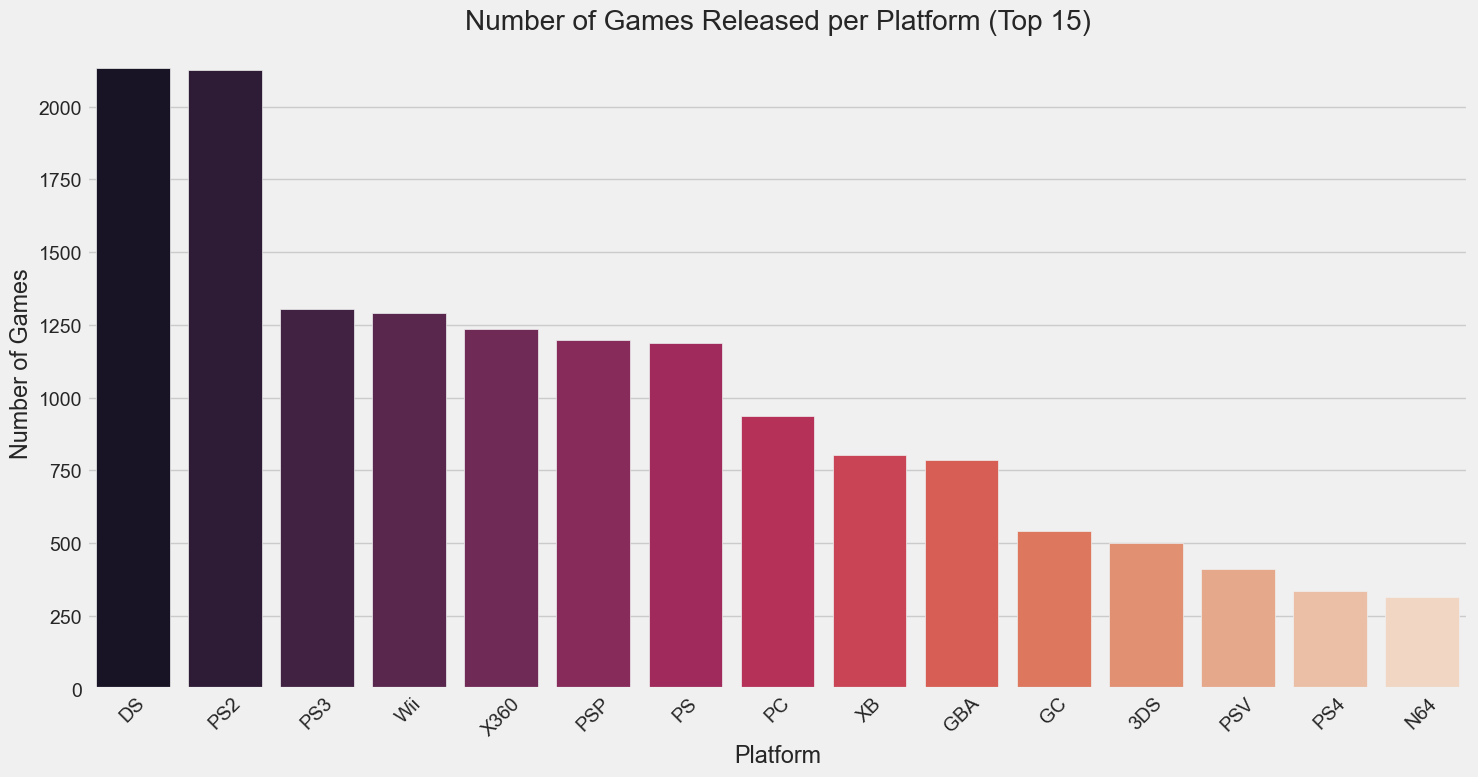

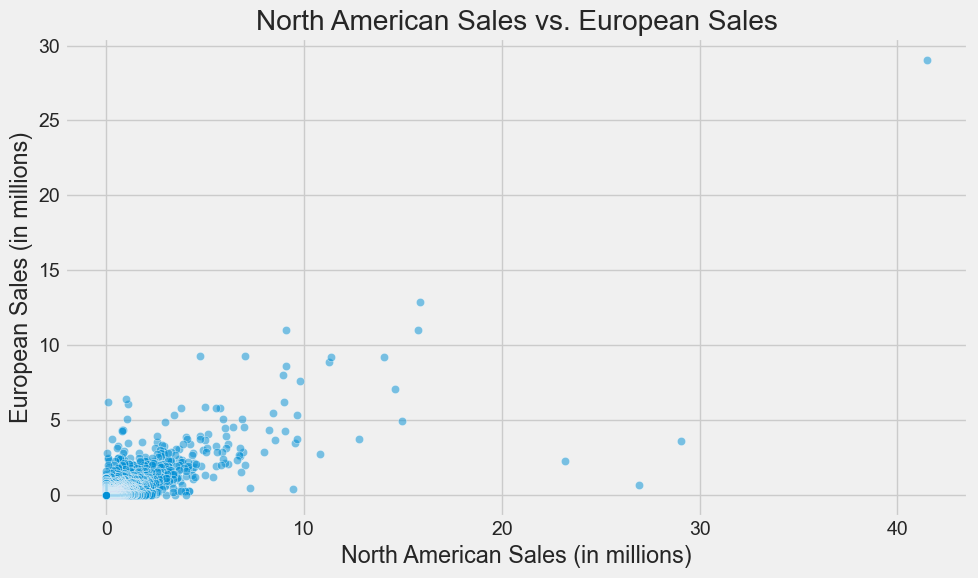

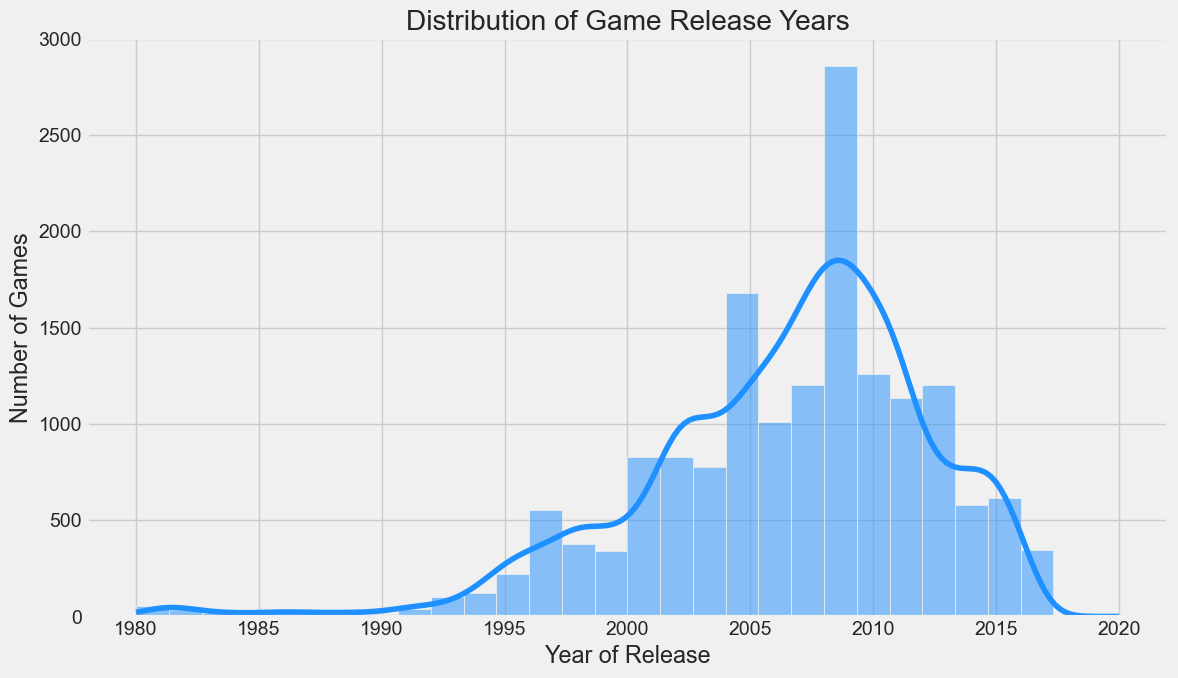

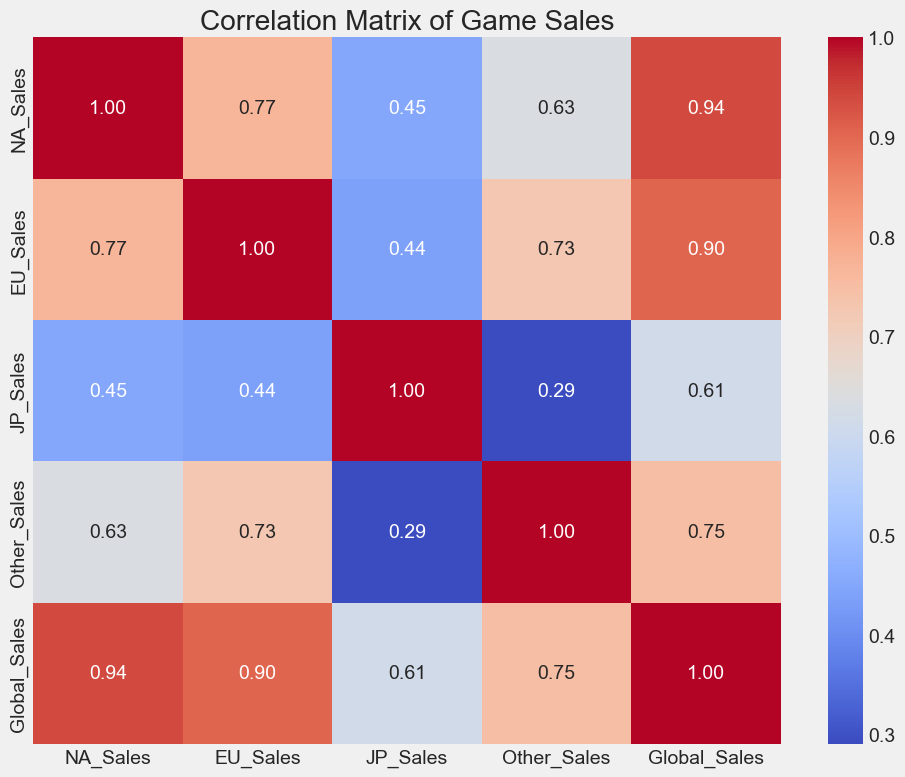


--- Generating Matplotlib Plots ---


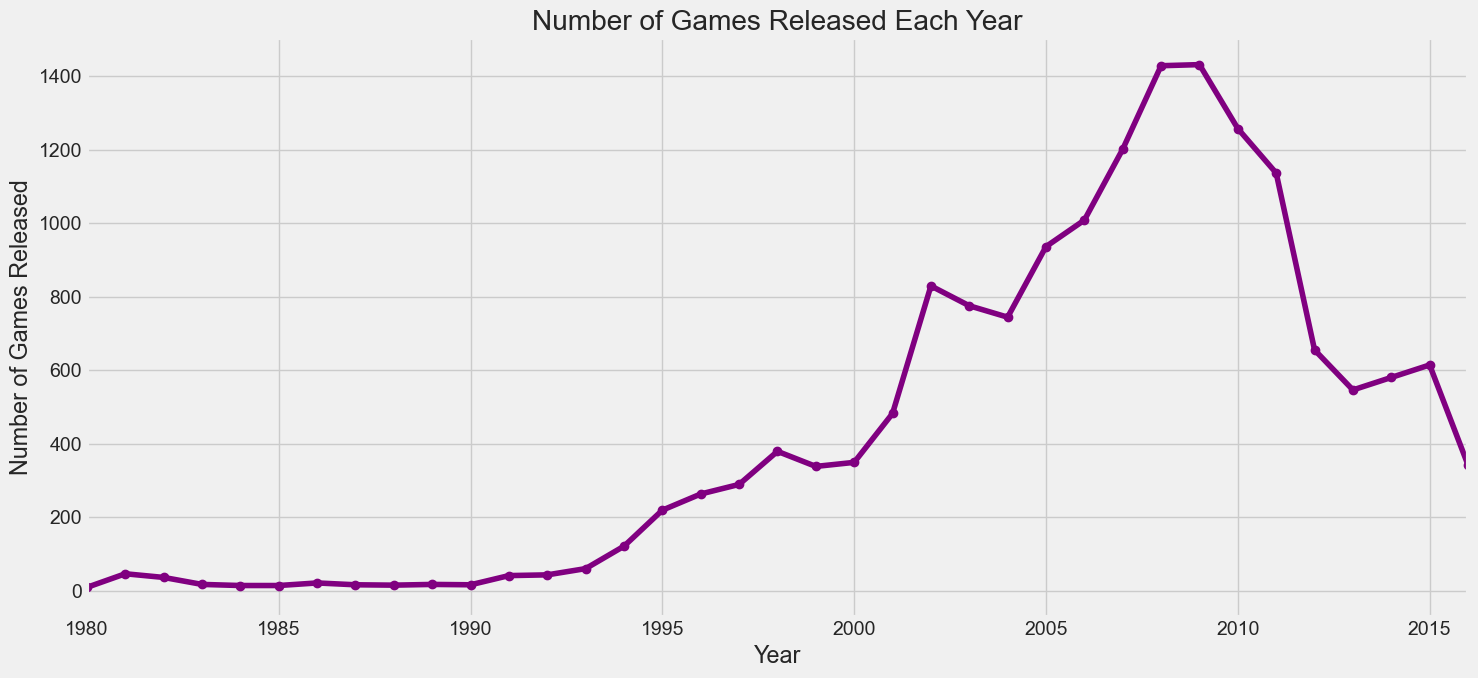

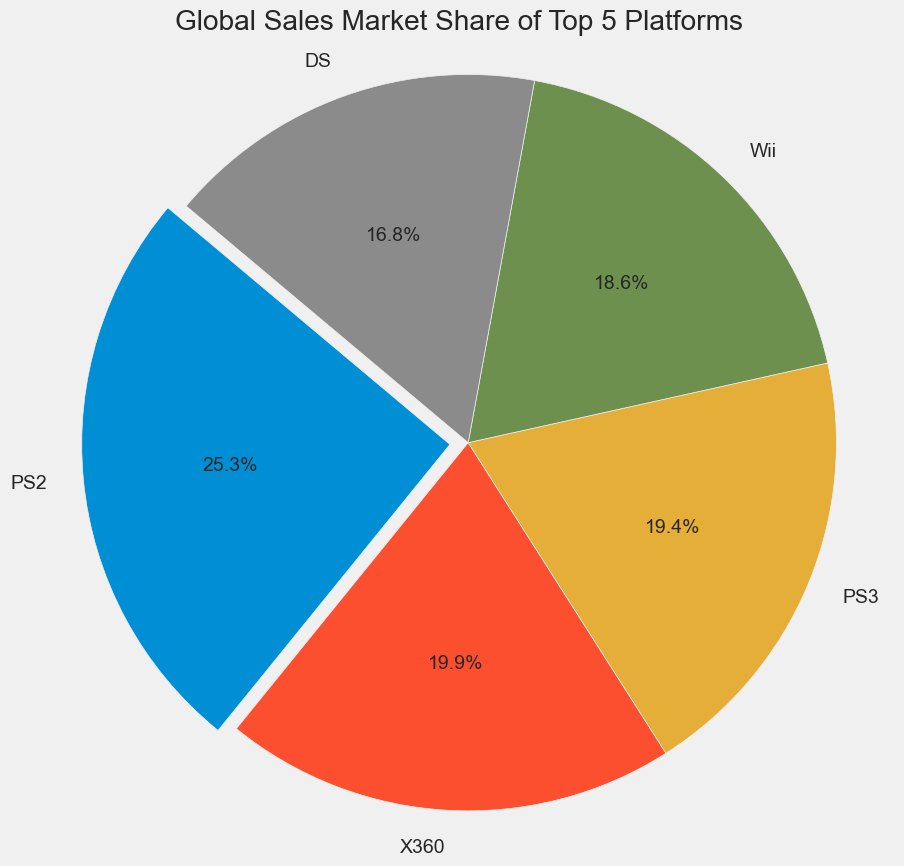

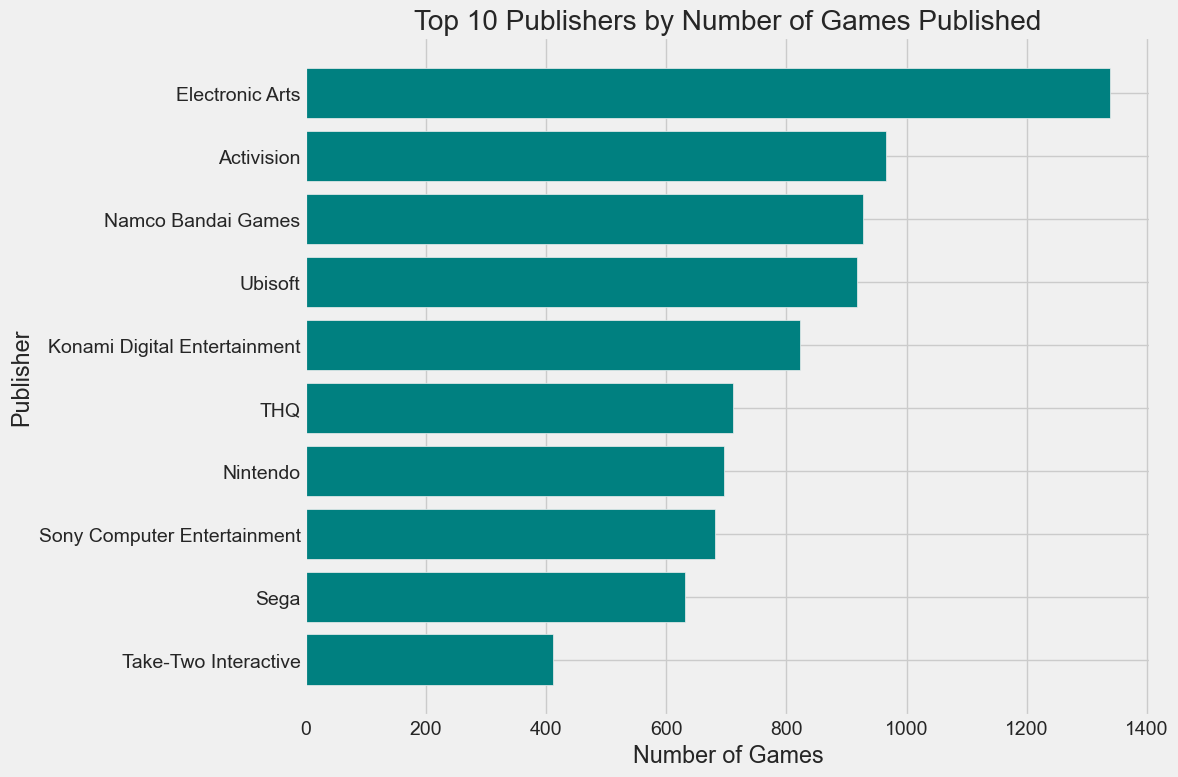

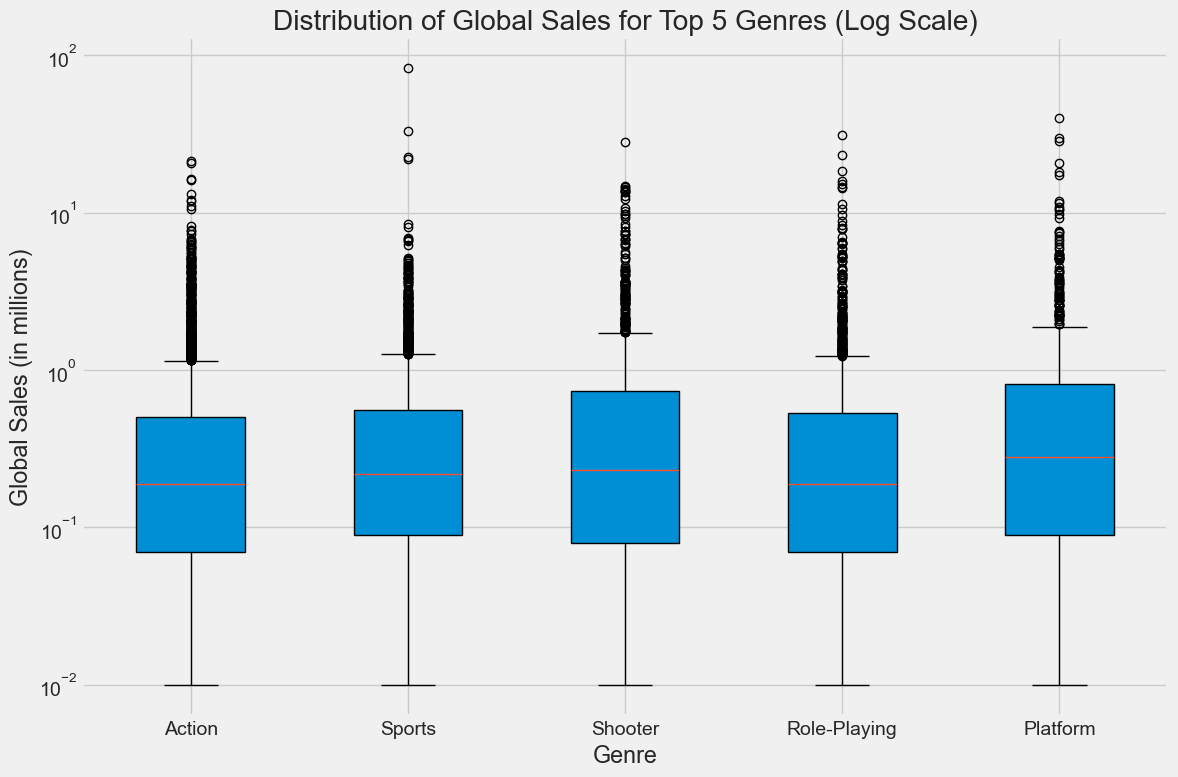

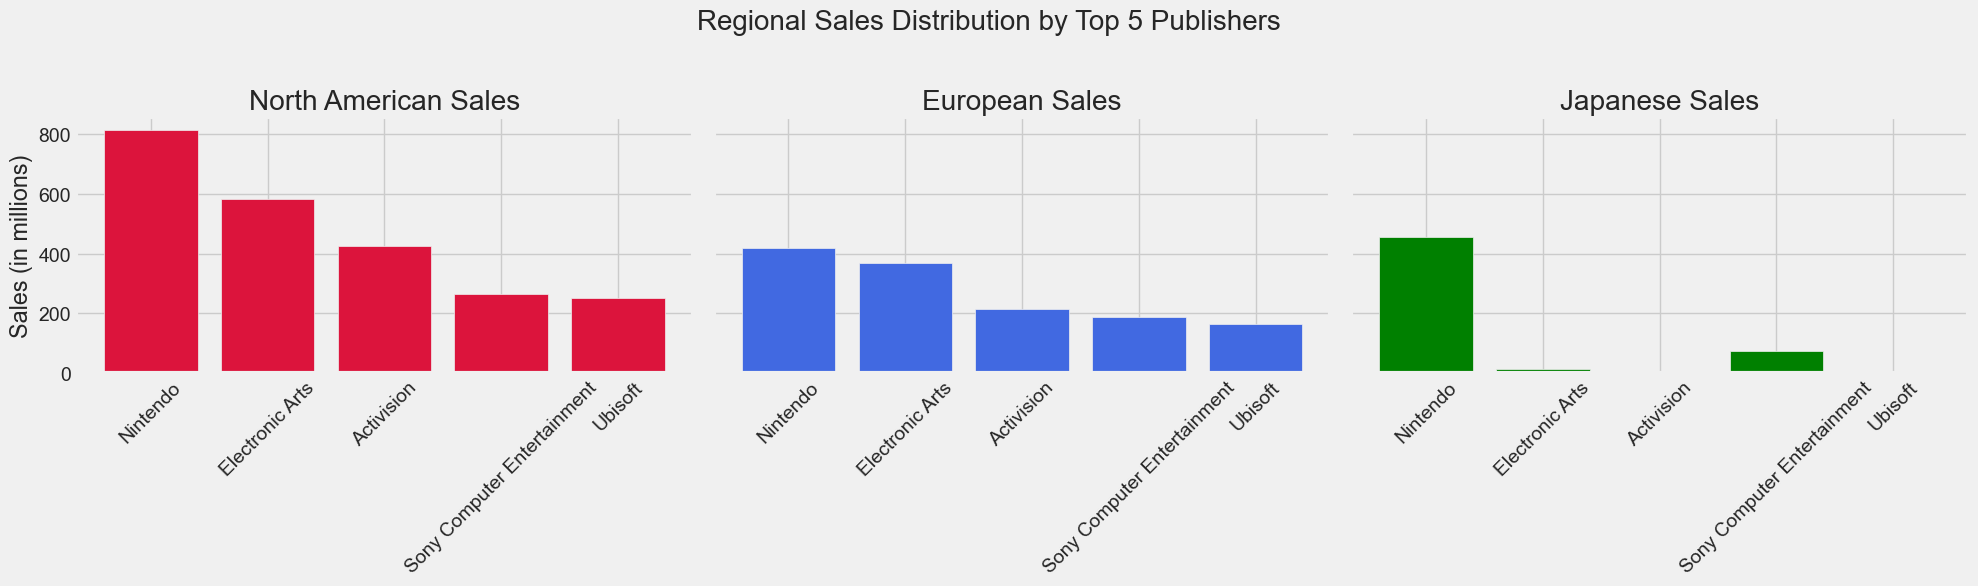


All plots have been generated and saved!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# This line reads the CSV file into a pandas DataFrame.
df = pd.read_csv('vgsales.csv')

print("First 5 rows of the dataset:")
print(df.head())

# Quick overview of the data types and non-null values
print("\nDataset Information:")
df.info()

# Remove rows with any missing data for simplicity.
df.dropna(inplace=True)

# Converting 'Year' to integer type
df['Year'] = df['Year'].astype(int)


# Seaborn Graphs
print("\n--- Generating Seaborn Plots ---")

# Graph 1: Bar Plot - Top 10 Genres by Global Sales
plt.figure(figsize=(12, 7))
top_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Game Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('seaborn_1_bar_plot.png') # Save the plot as an image
plt.show()

# Graph 2: Count Plot - Number of Games per Platform (Top 15)
plt.figure(figsize=(15, 8))
top_platforms = df['Platform'].value_counts().head(15).index
sns.countplot(data=df, x='Platform', order=top_platforms, palette='rocket')
plt.title('Number of Games Released per Platform (Top 15)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('seaborn_2_count_plot.png')
plt.show()

# Graph 3: Scatter Plot - North American Sales vs. European Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', alpha=0.5)
plt.title('North American Sales vs. European Sales')
plt.xlabel('North American Sales (in millions)')
plt.ylabel('European Sales (in millions)')
plt.tight_layout()
plt.savefig('seaborn_3_scatter_plot.png')
plt.show()

# Graph 4: Histogram - Distribution of Game Release Years
plt.figure(figsize=(12, 7))
sns.histplot(df['Year'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Game Release Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.savefig('seaborn_4_histogram.png')
plt.show()

# Graph 5: Heatmap - Correlation of Numerical Features
plt.figure(figsize=(10, 8))
# Select only the numerical columns for correlation
numerical_cols = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Game Sales')
plt.tight_layout()
plt.savefig('seaborn_5_heatmap.png')
plt.show()
# 

print("\n--- Generating Matplotlib Plots ---")

# Matplotlib Graphs

# Graph 6: Line Plot - Number of Games Released Each Year
yearly_releases = df.groupby('Year').size()
plt.figure(figsize=(15, 7))
plt.plot(yearly_releases.index, yearly_releases.values, marker='o', linestyle='-', color='purple')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.xlim(1980, 2016) # Focusing on the main years
plt.tight_layout()
plt.savefig('matplotlib_6_line_plot.png')
plt.show()

# Graph 7: Pie Chart - Market Share of Top 5 Platforms
top_5_platforms_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 10))
plt.pie(top_5_platforms_sales, labels=top_5_platforms_sales.index, autopct='%1.1f%%', startangle=140, explode=(0.05, 0, 0, 0, 0))
plt.title('Global Sales Market Share of Top 5 Platforms')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('matplotlib_7_pie_chart.png')
plt.show()

# Graph 8: Horizontal Bar Chart - Top 10 Publishers by Game Count
top_publishers = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_publishers.index, top_publishers.values, color='teal')
plt.gca().invert_yaxis() # To display the highest count at the top
plt.title('Top 10 Publishers by Number of Games Published')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.tight_layout()
plt.savefig('matplotlib_8_horizontal_bar.png')
plt.show()

# Graph 9: Box Plot - Distribution of Global Sales by Genre (Top 5 Genres)
top_5_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
# Filter the dataframe to only include these top 5 genres
df_top_genres = df[df['Genre'].isin(top_5_genres)]
plt.figure(figsize=(12, 8))
# Create a list of sales data for each genre
data_to_plot = [df_top_genres[df_top_genres['Genre'] == genre]['Global_Sales'] for genre in top_5_genres]
plt.boxplot(data_to_plot, labels=top_5_genres, patch_artist=True)
plt.title('Distribution of Global Sales for Top 5 Genres (Log Scale)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.yscale('log') # Use a log scale to better visualize the spread due to outliers
plt.tight_layout()
plt.savefig('matplotlib_9_box_plot.png')
plt.show()

# Graph 10: Subplots - Comparing Sales Across Regions
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Regional Sales Distribution by Top 5 Publishers', fontsize=20)
top_5_publishers_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().sort_values('NA_Sales', ascending=False).head(5)

# North America
axes[0].bar(top_5_publishers_sales.index, top_5_publishers_sales['NA_Sales'], color='crimson')
axes[0].set_title('North American Sales')
axes[0].set_ylabel('Sales (in millions)')
axes[0].tick_params(axis='x', rotation=45)

# Europe
axes[1].bar(top_5_publishers_sales.index, top_5_publishers_sales['EU_Sales'], color='royalblue')
axes[1].set_title('European Sales')
axes[1].tick_params(axis='x', rotation=45)

# Japan
axes[2].bar(top_5_publishers_sales.index, top_5_publishers_sales['JP_Sales'], color='green')
axes[2].set_title('Japanese Sales')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.savefig('matplotlib_10_subplots.png')
plt.show()
# 

print("\nAll plots have been generated and saved!")